In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.5'

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [5]:
df=pd.read_csv("count_matrix.csv")
df.rename(columns={"subject": "sample"},inplace=True)

In [6]:
df['subject']=df['sample'].astype(str).str[0:7]

In [7]:
df.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_E paired human Q20 aligned,SVA_F unpaired reads aligned,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,4581,12823,11788,4762,4719,8134,2632,2216,2170,02-2483
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,4016,10290,9529,3830,3791,6732,2296,1910,1878,02-2483
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,4690,11766,10748,4482,4433,8146,2701,2262,2217,02-2485
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,3959,8731,8061,3293,3252,6392,2246,1893,1860,02-2485
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,10953,24154,22406,9480,9421,17454,6553,5567,5507,06-0125


In [8]:
df[['subject','sample']].head()

,subject,sample
0,02-2483,02-2483-01A
1,02-2483,02-2483-10A
2,02-2485,02-2485-01A
3,02-2485,02-2485-10A
4,06-0125,06-0125-01A


In [9]:
df['normalized HERVK113 unpaired human Q00 aligned']=df['HERVK113 unpaired human Q00 aligned']/df['raw pair count']

In [10]:
df['normalized HERVK113 unpaired human Q20 aligned']=df['HERVK113 unpaired human Q20 aligned']/df['raw pair count']

In [11]:
tumor=df[df['sample'].str.contains("-01.$")].copy()

In [12]:
tumor.shape

(123, 61)

In [13]:
tumor.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,normalized HERVK113 unpaired human Q00 aligned,normalized HERVK113 unpaired human Q20 aligned
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,11788,4762,4719,8134,2632,2216,2170,02-2483,0.000009,0.000005
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,10748,4482,4433,8146,2701,2262,2217,02-2485,0.000009,0.000005
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,22406,9480,9421,17454,6553,5567,5507,06-0125,0.000008,0.000005
8,06-0157-01A,551037711,5322,5247,3005,2996,3280,1465,1361,1338,...,10994,4524,4476,9170,3202,2611,2576,06-0157,0.000010,0.000005
10,06-0171-01A,1170585350,9069,8940,5227,5190,6420,2949,2719,2672,...,23053,9536,9441,18872,6913,5768,5693,06-0171,0.000008,0.000004


In [14]:
normal=df[df['sample'].str.contains("-10.$")].copy()

In [15]:
normal.shape

(123, 61)

In [16]:
normal.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,normalized HERVK113 unpaired human Q00 aligned,normalized HERVK113 unpaired human Q20 aligned
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,9529,3830,3791,6732,2296,1910,1878,02-2483,0.000008,0.000005
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,8061,3293,3252,6392,2246,1893,1860,02-2485,0.000008,0.000005
6,06-0125-10A,695377506,5184,5103,2905,2892,3778,1643,1520,1494,...,12404,5121,5075,9524,3309,2785,2748,06-0125,0.000007,0.000004
9,06-0157-10A,561676819,4434,4345,2471,2458,3040,1303,1195,1179,...,10583,4106,4061,7982,2554,2059,2022,06-0157,0.000008,0.000004
12,06-0171-10A,721570484,5428,5302,3065,3048,3472,1440,1322,1306,...,13579,5429,5378,9214,2859,2383,2350,06-0171,0.000007,0.000004




# Raw counts


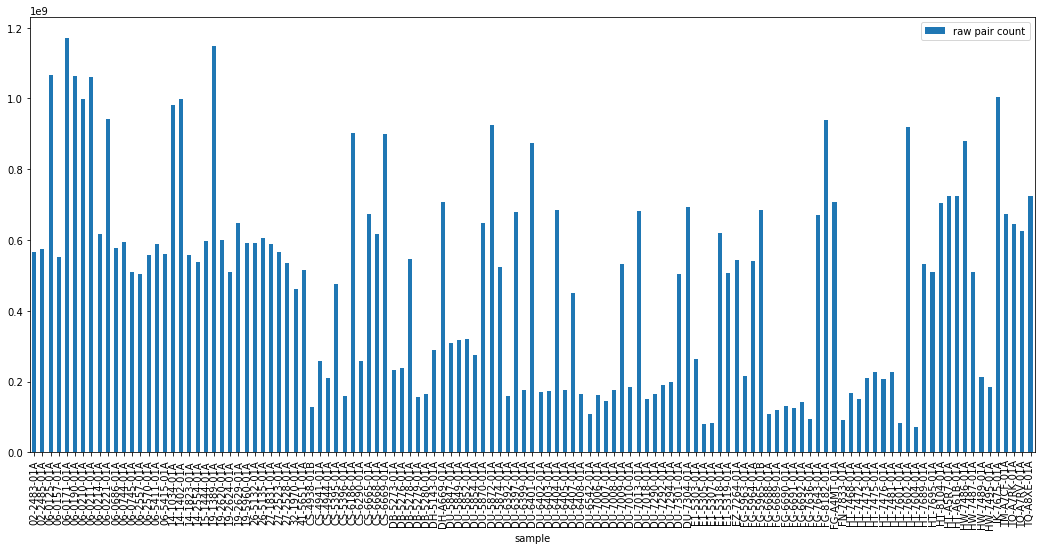

In [17]:
tumor.plot(x='sample',y='raw pair count',kind='bar')

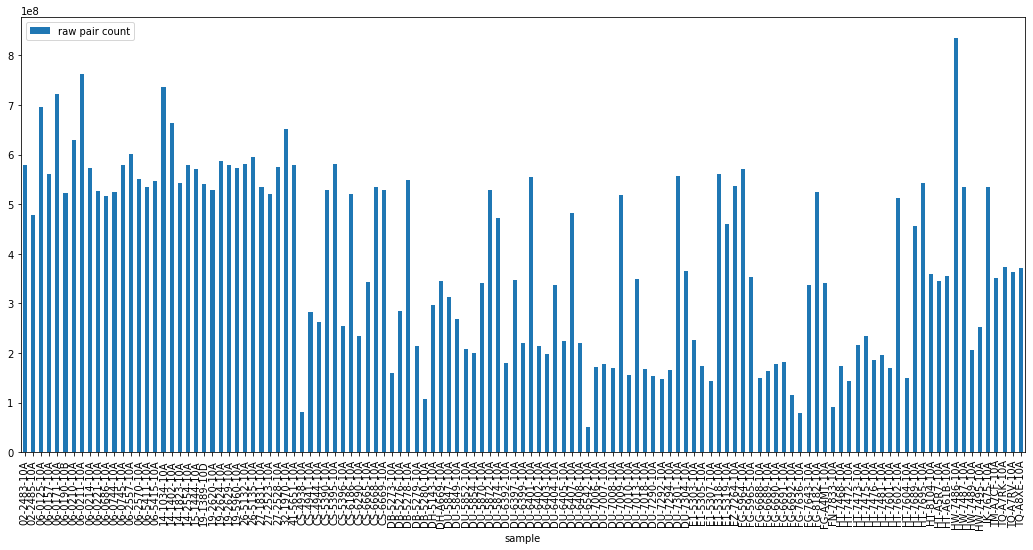

In [18]:
normal.plot(x='sample',y='raw pair count',kind='bar')

In [19]:
normal['subject']

1      02-2483
3      02-2485
6      06-0125
9      06-0157
12     06-0171
        ...   
260    IK-7675
263    TM-A7CF
267    TQ-A7RK
270    TQ-A7RV
273    TQ-A8XE
Name: subject, Length: 123, dtype: object

In [20]:
tumor['subject']

0      02-2483
2      02-2485
4      06-0125
8      06-0157
10     06-0171
        ...   
259    IK-7675
261    TM-A7CF
264    TQ-A7RK
268    TQ-A7RV
271    TQ-A8XE
Name: subject, Length: 123, dtype: object

## Tumor Normal comparison

In [21]:
#tn=normal.join(tumor,on='subject',lsuffix="_normal",rsuffix="_tumor",how='outer')
tn=normal.merge(tumor,on='subject',suffixes=["_normal","_tumor"],how='outer')

In [22]:
tn.head()

,sample_normal,raw pair count_normal,HERVK113 unpaired reads aligned_normal,HERVK113 unpaired human Q00 aligned_normal,HERVK113 unpaired human Q10 aligned_normal,HERVK113 unpaired human Q20 aligned_normal,HERVK113 paired reads aligned_normal,HERVK113 paired human Q00 aligned_normal,HERVK113 paired human Q10 aligned_normal,HERVK113 paired human Q20 aligned_normal,...,SVA_F unpaired reads aligned_tumor,SVA_F unpaired human Q00 aligned_tumor,SVA_F unpaired human Q10 aligned_tumor,SVA_F unpaired human Q20 aligned_tumor,SVA_F paired reads aligned_tumor,SVA_F paired human Q00 aligned_tumor,SVA_F paired human Q10 aligned_tumor,SVA_F paired human Q20 aligned_tumor,normalized HERVK113 unpaired human Q00 aligned_tumor,normalized HERVK113 unpaired human Q20 aligned_tumor
0,02-2483-10A,579304076.0,4735.0,4646.0,2687.0,2673.0,3338.0,1474.0,1333.0,1308.0,...,12823.0,11788.0,4762.0,4719.0,8134.0,2632.0,2216.0,2170.0,0.000009,0.000005
1,02-2485-10A,478851061.0,3895.0,3849.0,2229.0,2221.0,2564.0,1162.0,1073.0,1061.0,...,11766.0,10748.0,4482.0,4433.0,8146.0,2701.0,2262.0,2217.0,0.000009,0.000005
2,06-0125-10A,695377506.0,5184.0,5103.0,2905.0,2892.0,3778.0,1643.0,1520.0,1494.0,...,24154.0,22406.0,9480.0,9421.0,17454.0,6553.0,5567.0,5507.0,0.000008,0.000005
3,06-0157-10A,561676819.0,4434.0,4345.0,2471.0,2458.0,3040.0,1303.0,1195.0,1179.0,...,12049.0,10994.0,4524.0,4476.0,9170.0,3202.0,2611.0,2576.0,0.000010,0.000005
4,06-0171-10A,721570484.0,5428.0,5302.0,3065.0,3048.0,3472.0,1440.0,1322.0,1306.0,...,24960.0,23053.0,9536.0,9441.0,18872.0,6913.0,5768.0,5693.0,0.000008,0.000004


In [23]:
tn[['subject','sample_normal','raw pair count_normal','sample_tumor','raw pair count_tumor']].head()

,subject,sample_normal,raw pair count_normal,sample_tumor,raw pair count_tumor
0,02-2483,02-2483-10A,579304076.0,02-2483-01A,5.660245e+08
1,02-2485,02-2485-10A,478851061.0,02-2485-01A,5.750605e+08
2,06-0125,06-0125-10A,695377506.0,06-0125-01A,1.066269e+09
3,06-0157,06-0157-10A,561676819.0,06-0157-01A,5.510377e+08
4,06-0171,06-0171-10A,721570484.0,06-0171-01A,1.170585e+09


In [24]:
plt.rcParams["figure.figsize"] = [18.0,18.0]

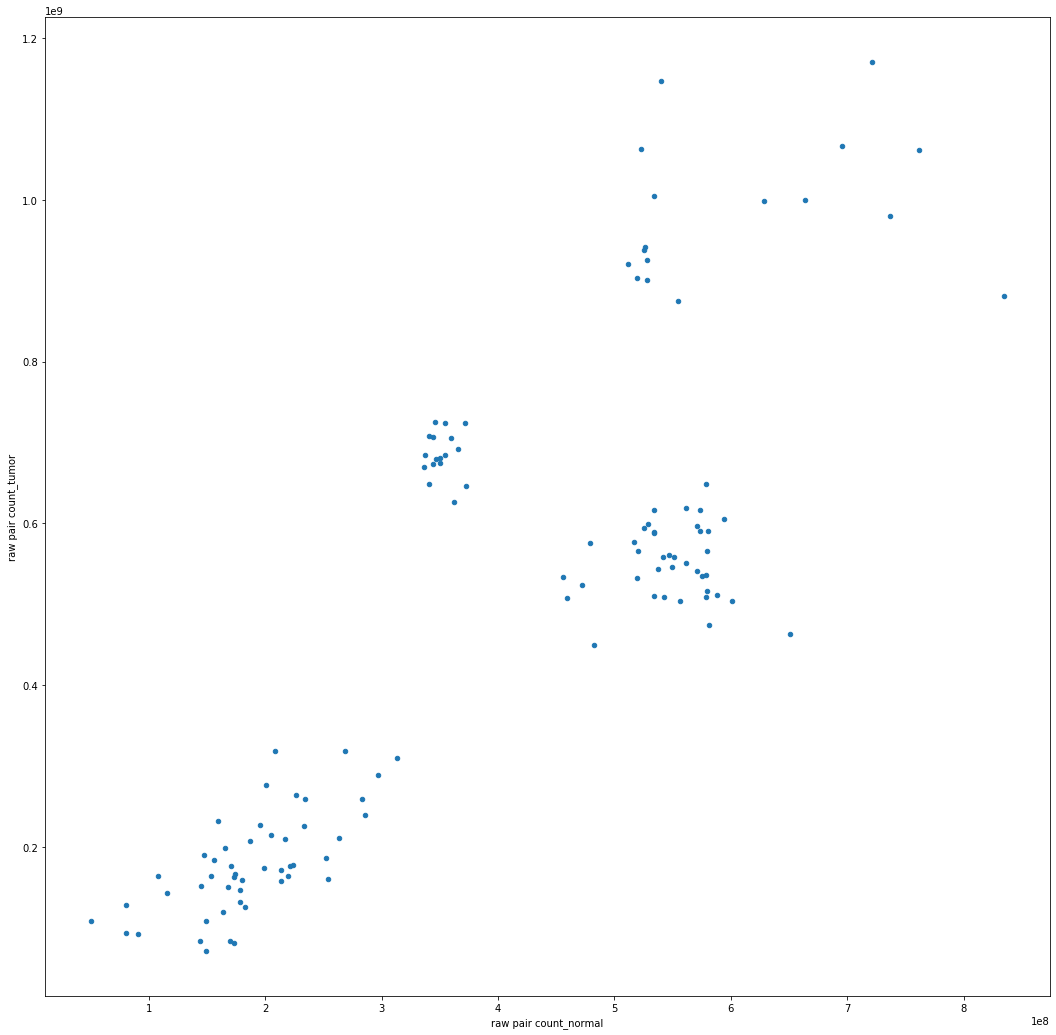

In [25]:
tn.plot(x='raw pair count_normal',y='raw pair count_tumor',kind='scatter')

In [26]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [27]:
tn['raw count ratio']=tn['raw pair count_tumor']/tn['raw pair count_normal']

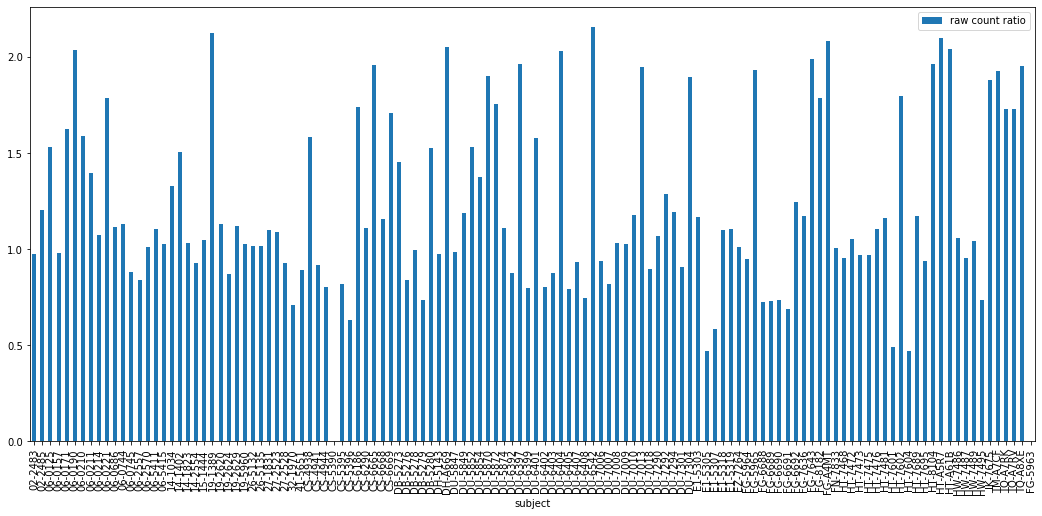

In [28]:
tn.plot(x='subject',y='raw count ratio',kind='bar')

In [29]:
df[df['subject']=='CS-5390']

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,subject,normalized HERVK113 unpaired human Q00 aligned,normalized HERVK113 unpaired human Q20 aligned
84,CS-5390-10A,529225224,4273,4213,2422,2419,2814,1269,1180,1161,...,8568,3630,3608,4288,1541,1310,1290,CS-5390,0.000008,0.000005




# Below are plots of total HERV insertion counts



In [30]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

## Tumor counts

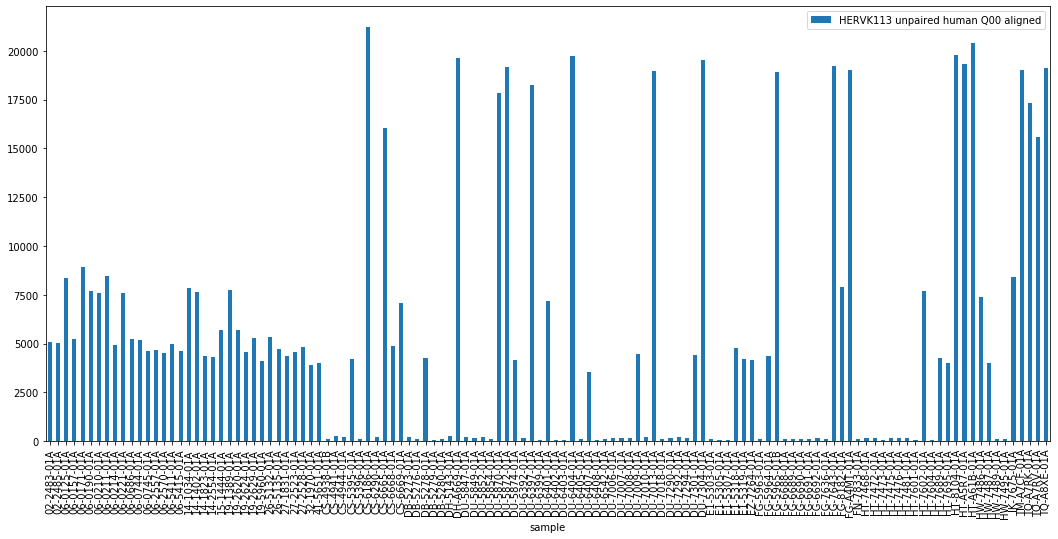

In [31]:
tumor.plot(x='sample',y='HERVK113 unpaired human Q00 aligned',kind='bar')

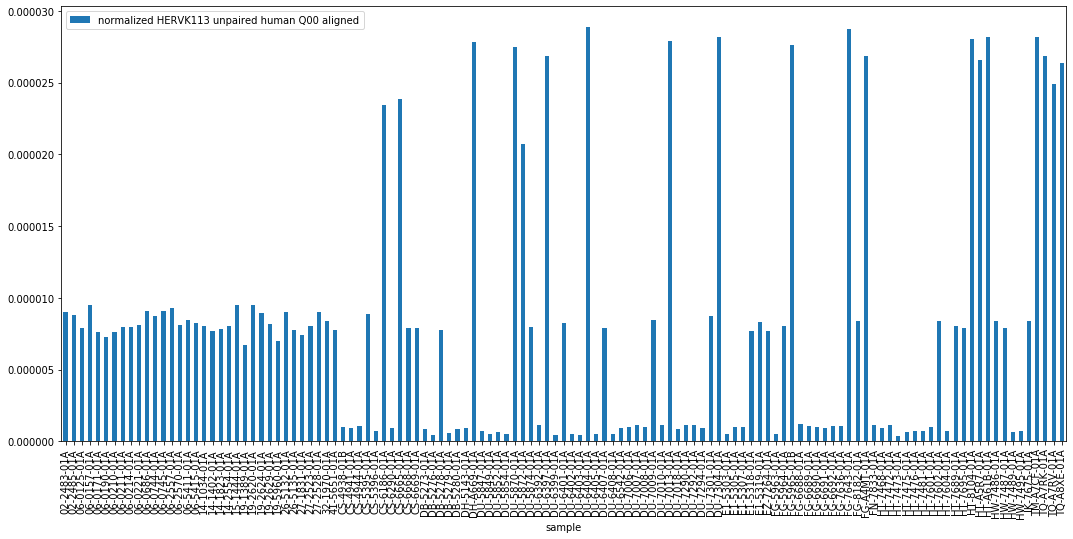

In [32]:
tumor.plot(x='sample',y='normalized HERVK113 unpaired human Q00 aligned',kind='bar')

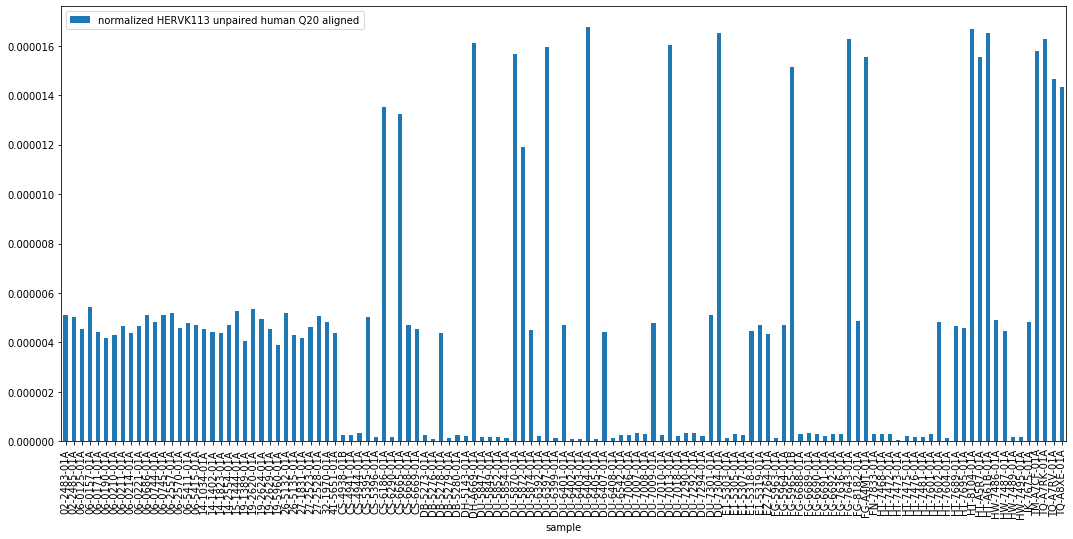

In [33]:
tumor.plot(x='sample',y='normalized HERVK113 unpaired human Q20 aligned',kind='bar')

## Normal HERV counts

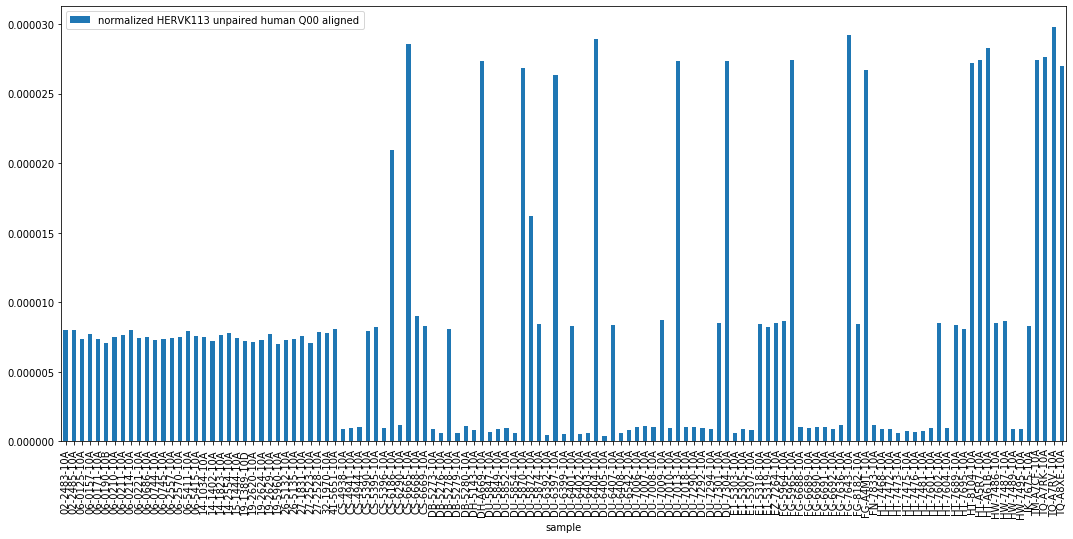

In [34]:
normal.plot(x='sample',y='normalized HERVK113 unpaired human Q00 aligned',kind='bar')

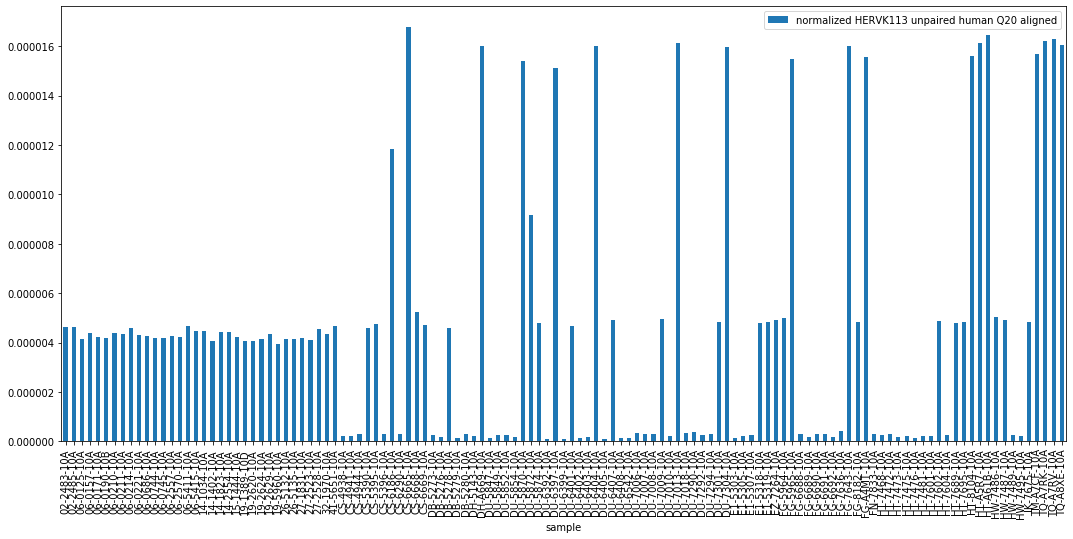

In [35]:
normal.plot(x='sample',y='normalized HERVK113 unpaired human Q20 aligned',kind='bar')